In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nickkharin","key":"e2d630630798f96384a5d0ba3b7bc77d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.21G/1.21G [00:14<00:00, 78.6MB/s]
100% 1.21G/1.21G [00:14<00:00, 87.2MB/s]


In [ ]:
!unzip gtzan-dataset-music-genre-classification.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [ ]:
df = pd.read_csv("../content/Data/features_3_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [ ]:
df.shape

(9990, 60)

In [ ]:
df.dtypes

## Введение


In [ ]:
audio ="../content/Data/genres_original/reggae/reggae.00010.wav"
data,sr=librosa.load(audio)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio,sr=45600)

(array([-0.00555292, -0.00768963, -0.00668519, ...,  0.08035277,
         0.06637131,  0.03239053], dtype=float32),
 45600)

Short-time Fourier transform или
STFT широко используется в музыкальной обработке, анализе речи и других аудиоприложениях для изучения спектрального содержания сигналов во времени. Это позволяет идентифицировать и классифицировать различные звуковые события.


In [ ]:
y = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(y), ref=np.max)

In [ ]:
import IPython
IPython.display.Audio(data,rate=sr)

При работе с аудиоданными для анализа лучше использовать файлы в формате .wav. Формат .mp3 же следует конвертировать в .wav, так как это стандартный формат для аудиоанализа.

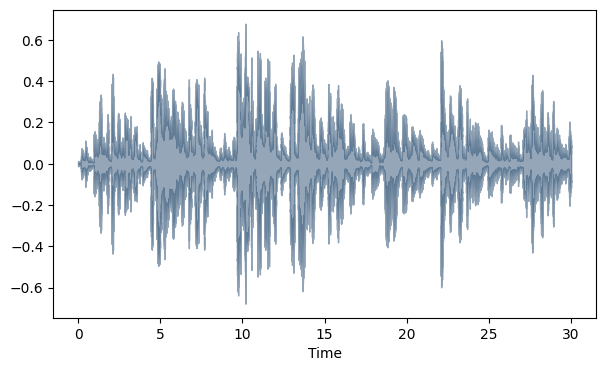

In [ ]:
plt.figure(figsize=(7,4))
librosa.display.waveshow(data,color="#2B4F72", alpha = 0.5)
plt.show()

Спектрограмма показывает, как изменяется громкость сигнала на разных частотах с течением времени, позволяя анализировать динамику энергии сигнала.

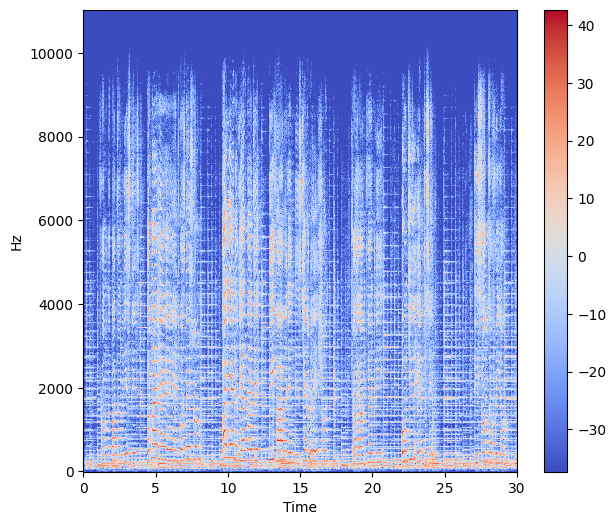

In [ ]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(7,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

## Анализ данных и препроцессинг
Спектрограмма и Wave форма аудио

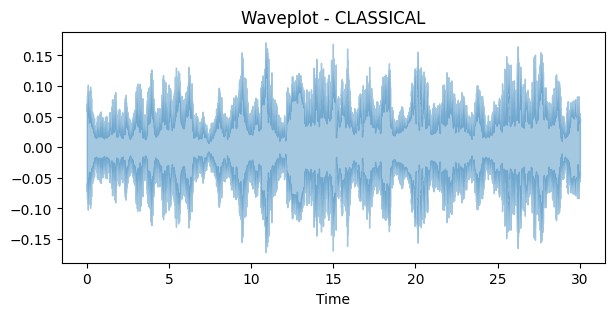

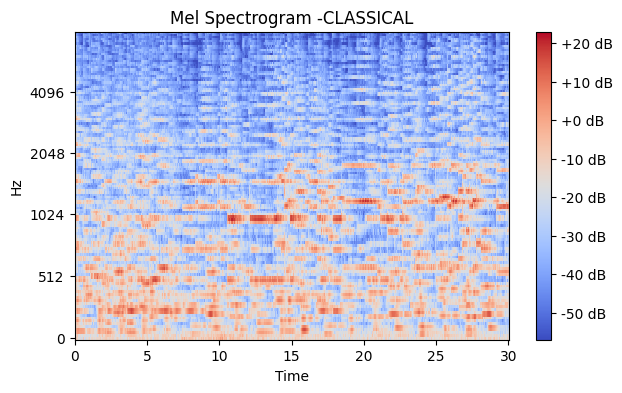

In [ ]:
# Классика
audio1= '../content/Data/genres_original/classical/classical.00001.wav'
data, sr = librosa.load(audio1)
# wave график
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - CLASSICAL')

# Спектрограмма
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram -CLASSICAL')
plt.colorbar(format='%+2.0f dB');

ipd.Audio(audio1)

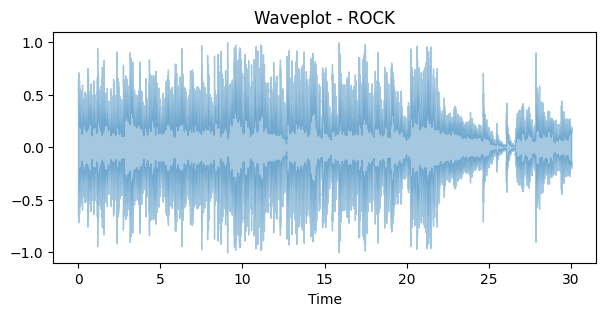

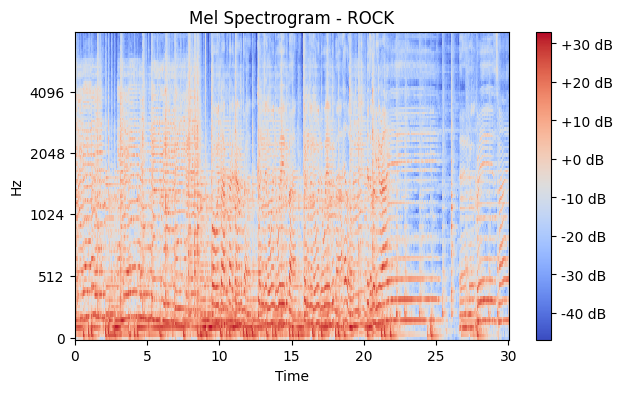

In [ ]:
# Рок
audio1= '../content/Data/genres_original/rock/rock.00001.wav'
data, sr = librosa.load(audio1)
# wave график
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - ROCK')

# Спектрограмма
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - ROCK')
plt.colorbar(format='%+2.0f dB');

ipd.Audio(audio1)

Кодирование меток (Label Encoding) - это процесс присвоения числовых целочисленных значений категориальным классам для обучения. У нас есть такие жанры:
* Blues - 0
* Classical - 1
* Country - 2
* Disco - 3
* Hip-hop - 4
* Jazz - 5
* Metal - 6
* Pop - 7
* Reggae - 8
* Rock - 9

In [ ]:
class_encod=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
df=df.drop(labels="filename",axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Обучение

Keras - это пользовательский интерфейс для TensorFlow, ориентированный на удобство и эффективность в области глубокого обучения, облегчающий разработку и применение решений машинного обучения.

In [ ]:
def train_model(model,epochs,optimizer):
    batch_size=256
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10,activation='softmax'),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.000146)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()
model_history=train_model(model=model,epochs=600,optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 58)                0         
                                                                 
 dropout (Dropout)           (None, 58)                0         
                                                                 
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

## Валидация

In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=256)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

12/12 [==============================] - 0s 5ms/step - loss: 0.1998 - accuracy: 0.9456
The test loss is  0.19975218176841736
The best accuracy is:  94.56122517585754


In [ ]:
sample = X_test
sample = sample[np.newaxis, ...]
prediction = model.predict(X_test)
predicted_index = np.argmax(prediction, axis = 1)
print("Expected Index: {}, Predicted Index: {}".format(y_test, predicted_index))

94/94 [==============================] - 0s 2ms/step
Expected Index: [9 0 5 ... 1 4 1], Predicted Index: [9 0 5 ... 1 4 1]


Построение confusion matrix для анализа истинно положительных и истинно отрицательных результатов.

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
pred_x = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predicted_index )
cm


94/94 [==============================] - 0s 2ms/step


array([[273,   0,   4,   1,   0,   6,   2,   0,   0,   1],
       [  0, 292,   0,   0,   0,   4,   0,   0,   0,   0],
       [  5,   2, 266,   1,   0,   4,   0,   2,   4,   3],
       [  0,   0,   0, 281,   1,   1,   1,   4,   2,   3],
       [  0,   0,   2,   3, 289,   0,   2,   2,   2,   1],
       [  2,  15,   5,   0,   0, 287,   0,   0,   0,   2],
       [  0,   0,   0,   1,   0,   1, 307,   0,   1,   6],
       [  0,   1,   5,   9,   1,   0,   0, 275,   3,   1],
       [  0,   0,   0,   2,   1,   3,   1,   6, 298,   0],
       [  4,   2,   8,   5,   0,   2,   6,   2,   5, 266]])